Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2017/2018  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 30. listopada 2017.*

(c) 2015-2017 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. listopada 2017.**  
Rok za predaju: **6. studenog 2017. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [5]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [6]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [7]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

Accuracy score is 1.0


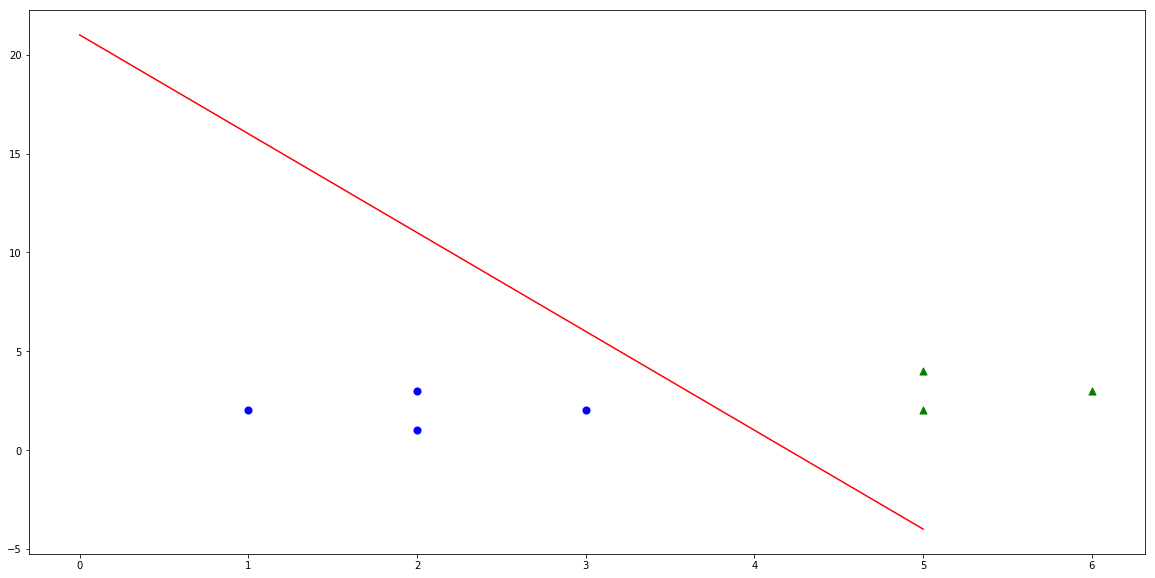

In [9]:
ridge = RidgeClassifier(alpha = 0).fit(seven_X, seven_y)
pylab.rcParams['figure.figsize'] = (20, 10)

for i in range(0, seven_y.size):
    if(seven_y[i]==0):
        plt.scatter(seven_X[:, 0][i], seven_X[:, 1][i], s=50, marker='^', color='g')
    else:
        plt.scatter(seven_X[:, 0][i], seven_X[:, 1][i], s=50, marker='o', color ='b' )


line = linspace(0, 5)
plt.plot(line, -(line*ridge.coef_[0][0]+ridge.intercept_)/ridge.coef_[0][1], 'r')
print("Accuracy score is {}".format(accuracy_score(seven_y,ridge.predict(seven_X))))
plt.show()

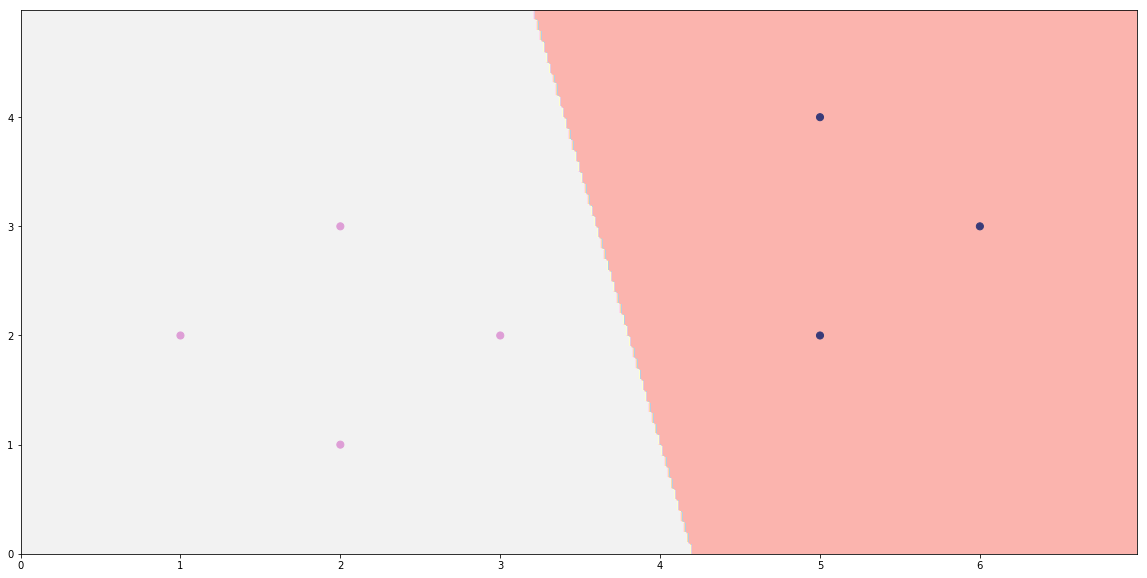

In [10]:
plot_2d_clf_problem(seven_X, seven_y, lambda x: ridge.predict(x))

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Accuracy score is 1.0
[-0.25 -0.05]


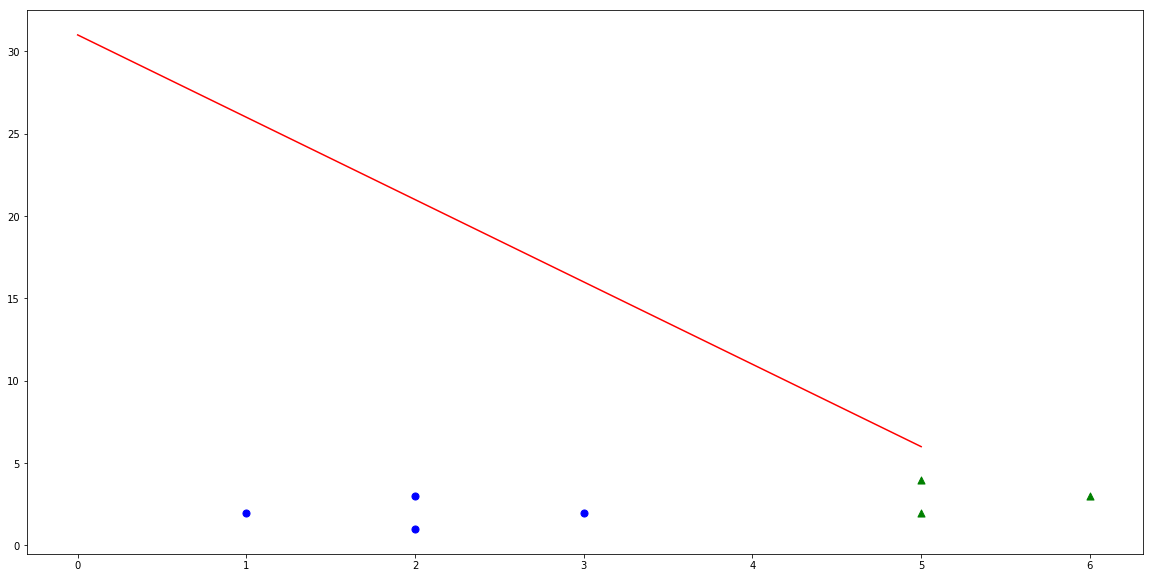

In [11]:
lin_regre = LinearRegression().fit(seven_X, seven_y)
pylab.rcParams['figure.figsize'] = (20, 10)

for i in range(0, seven_y.size):
    if(seven_y[i]==0):
        plt.scatter(seven_X[:, 0][i], seven_X[:, 1][i], s=50, marker='^', color='g')
    else:
        plt.scatter(seven_X[:, 0][i], seven_X[:, 1][i], s=50, marker='o', color ='b' )


line = linspace(0, 5)
print("Accuracy score is {}".format(accuracy_score(seven_y,lin_regre.predict(seven_X)>=0.5)))
plt.plot(line, -(line*lin_regre.coef_[0]+lin_regre.intercept_)/lin_regre.coef_[1], 'r')
print("{}".format(lin_regre.coef_))
plt.show()

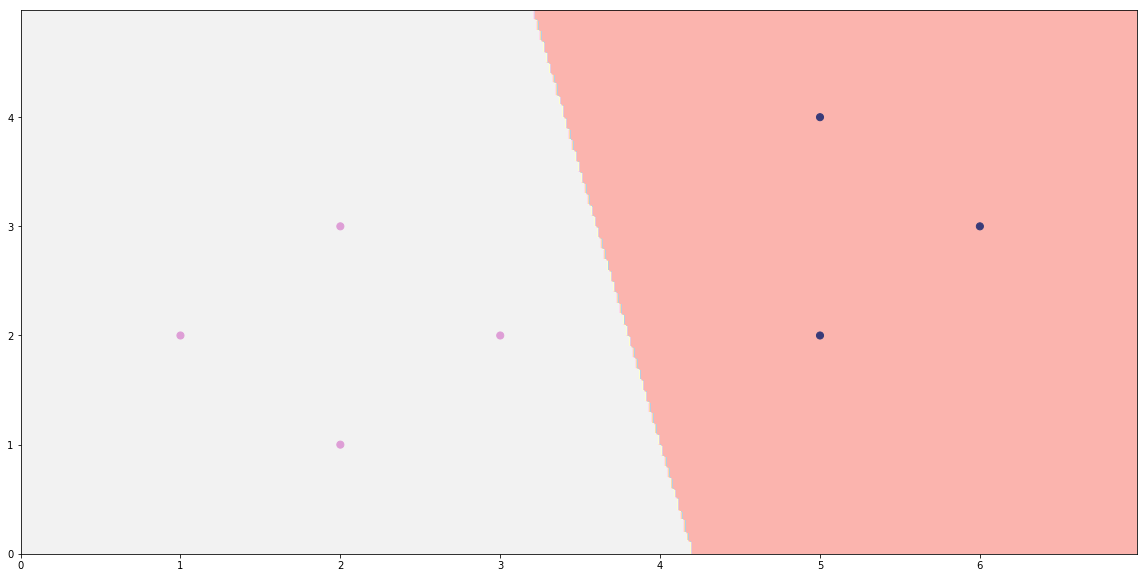

In [12]:
plot_2d_clf_problem(seven_X, seven_y, lambda x: lin_regre.predict(x)>=0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [13]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy score is 0.875


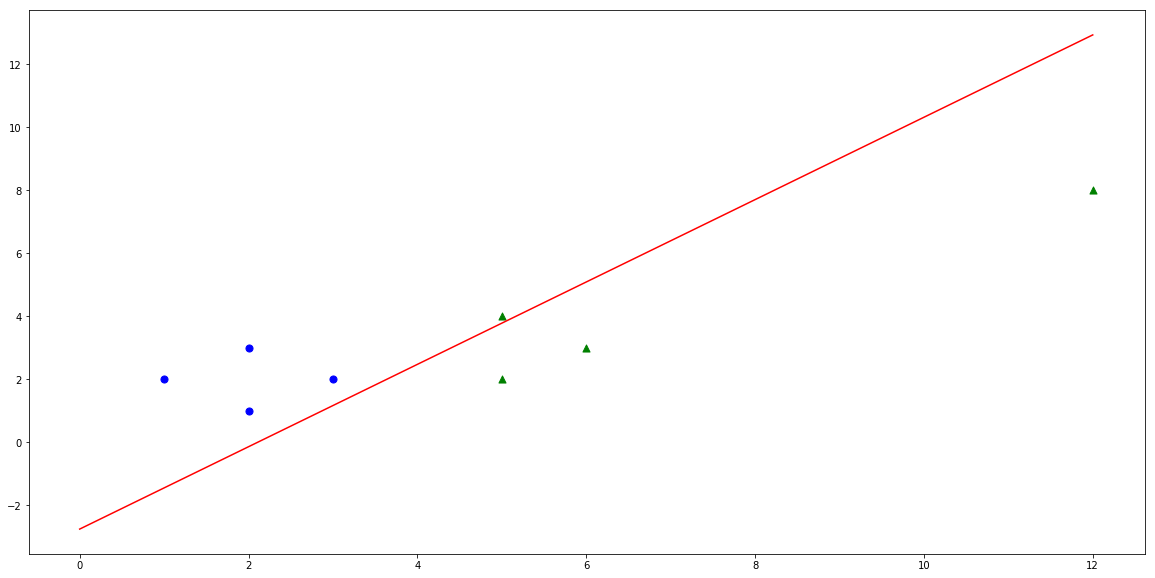

In [14]:
ridge = RidgeClassifier(alpha = 0).fit(outlier_X, outlier_y)
pylab.rcParams['figure.figsize'] = (20, 10)

for i in range(0, outlier_y.size):
    if(outlier_y[i]==0):
        plt.scatter(outlier_X[:, 0][i], outlier_X[:, 1][i], s=50, marker='^', color='g')
    else:
        plt.scatter(outlier_X[:, 0][i], outlier_X[:, 1][i], s=50, marker='o', color ='b' )


line = linspace(0, 12)
plt.plot(line, -(line*ridge.coef_[0][0]+ridge.intercept_)/ridge.coef_[0][1], 'r')
print("Accuracy score is {}".format(accuracy_score(outlier_y,ridge.predict(outlier_X))))
plt.show()

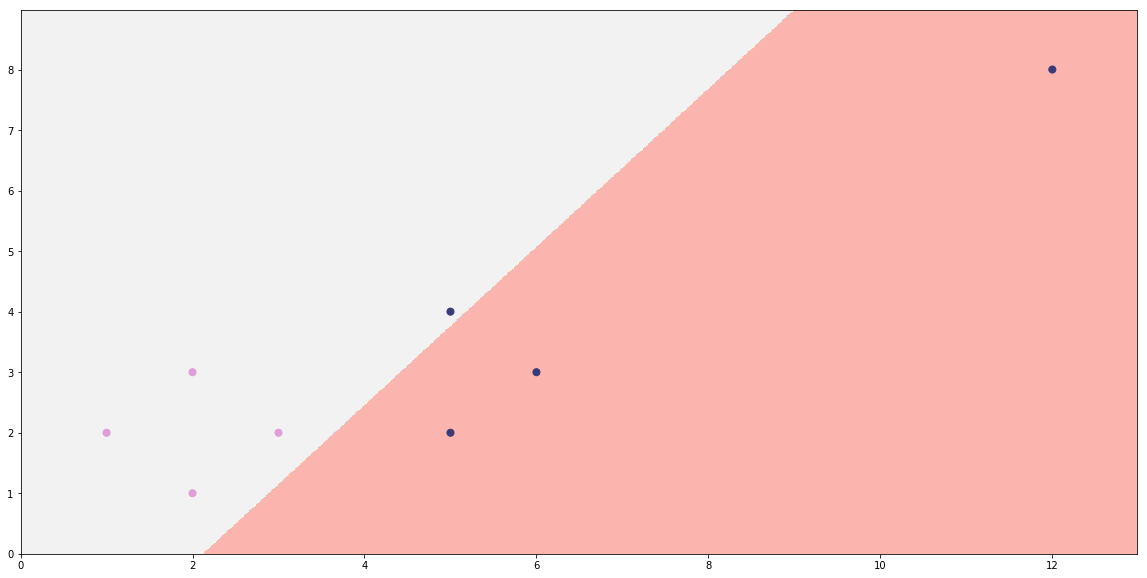

In [15]:
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: ridge.predict(x))

Accuracy score is 0.875


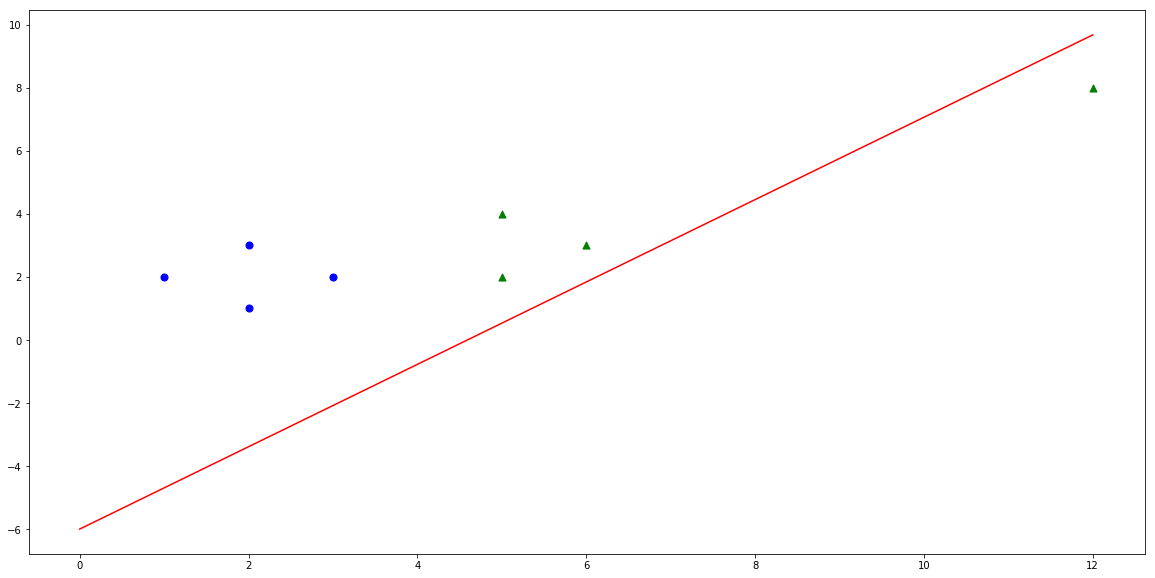

In [16]:
lin_regre = LinearRegression().fit(outlier_X, outlier_y)
pylab.rcParams['figure.figsize'] = (20, 10)

for i in range(0, outlier_y.size):
    if(outlier_y[i]==0):
        plt.scatter(outlier_X[:, 0][i], outlier_X[:, 1][i], s=50, marker='^', color='g')
    else:
        plt.scatter(outlier_X[:, 0][i], outlier_X[:, 1][i], s=50, marker='o', color ='b' )


line = linspace(0, 12)
print("Accuracy score is {}".format(accuracy_score(outlier_y,lin_regre.predict(outlier_X)>=0.5)))
plt.plot(line, -(line*lin_regre.coef_[0]+lin_regre.intercept_)/lin_regre.coef_[1], 'r')
plt.show()

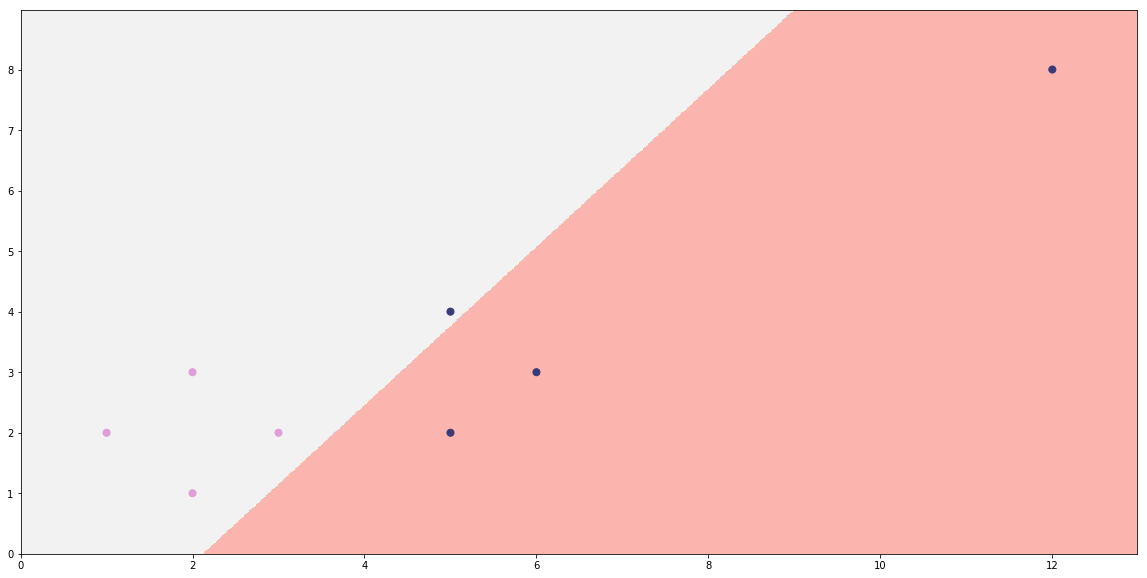

In [17]:
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: lin_regre.predict(x)>=0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [18]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy score is 0.875


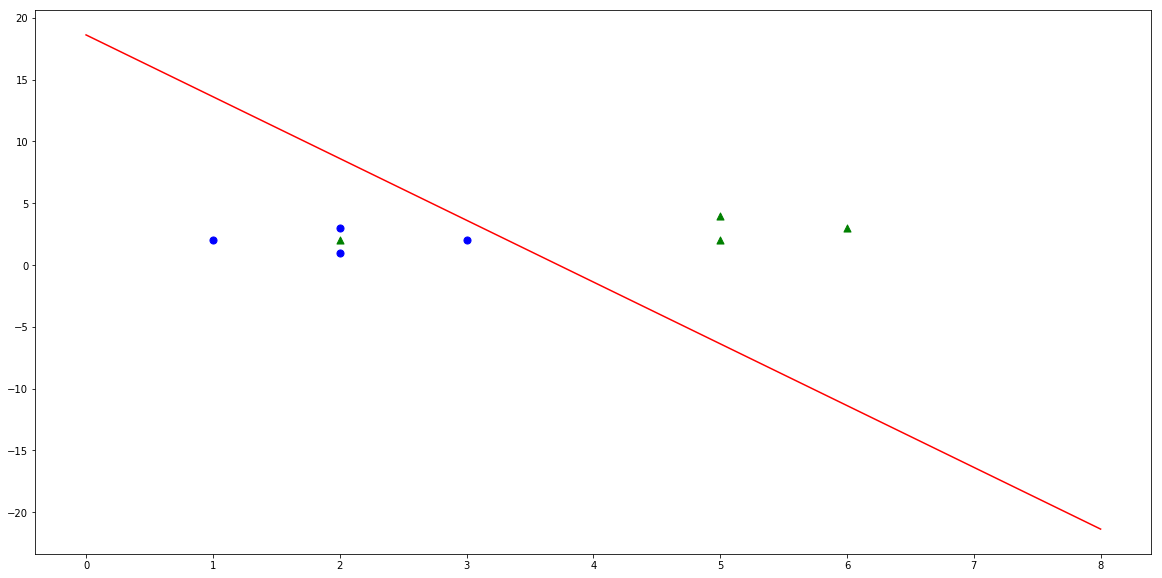

In [19]:
ridge = RidgeClassifier(alpha = 0).fit(unsep_X, unsep_y)
pylab.rcParams['figure.figsize'] = (20, 10)

for i in range(0, unsep_y.size):
    if(unsep_y[i]==0):
        plt.scatter(unsep_X[:, 0][i], unsep_X[:, 1][i], s=50, marker='^', color='g')
    else:
        plt.scatter(unsep_X[:, 0][i], unsep_X[:, 1][i], s=50, marker='o', color ='b' )


line = linspace(0, 8)
plt.plot(line, -(line*ridge.coef_[0][0]+ridge.intercept_)/ridge.coef_[0][1], 'r')
print("Accuracy score is {}".format(accuracy_score(unsep_y,ridge.predict(unsep_X))))
plt.show()

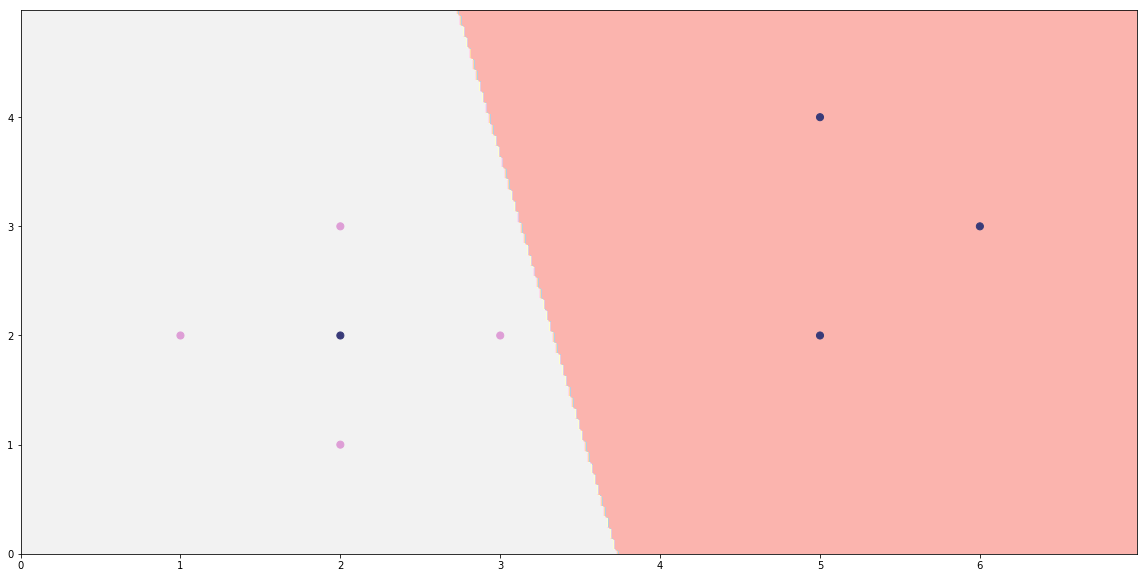

In [20]:
plot_2d_clf_problem(unsep_X, unsep_y, lambda x: ridge.predict(x))

Accuracy score is 0.875


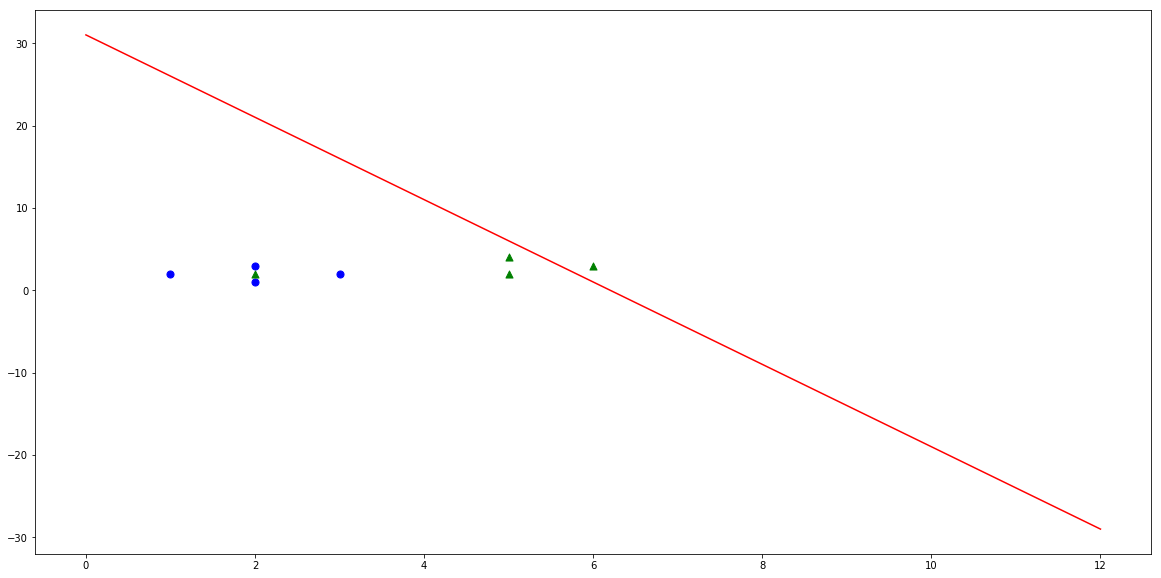

In [21]:
lin_regre = LinearRegression().fit(unsep_X, unsep_y)
pylab.rcParams['figure.figsize'] = (20, 10)

for i in range(0, unsep_y.size):
    if(unsep_y[i]==0):
        plt.scatter(unsep_X[:, 0][i], unsep_X[:, 1][i], s=50, marker='^', color='g')
    else:
        plt.scatter(unsep_X[:, 0][i], unsep_X[:, 1][i], s=50, marker='o', color ='b' )


line = linspace(0, 12)
print("Accuracy score is {}".format(accuracy_score(unsep_y,lin_regre.predict(unsep_X)>=0.5)))
plt.plot(line, -(line*lin_regre.coef_[0]+lin_regre.intercept_)/lin_regre.coef_[1], 'r')
plt.show()

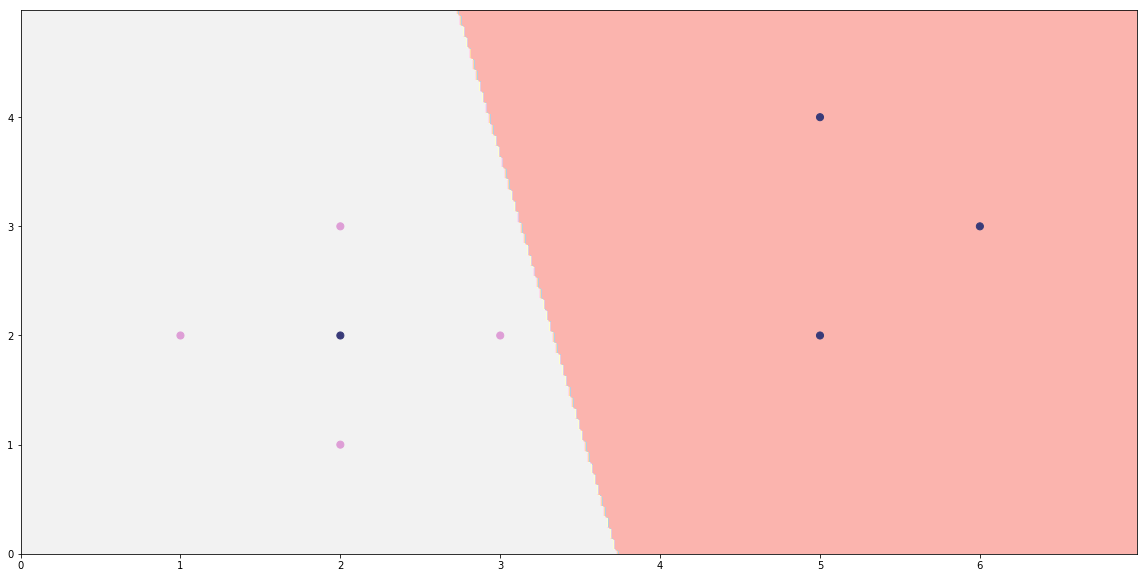

In [22]:
plot_2d_clf_problem(unsep_X, unsep_y, lambda x: lin_regre.predict(x)>=0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

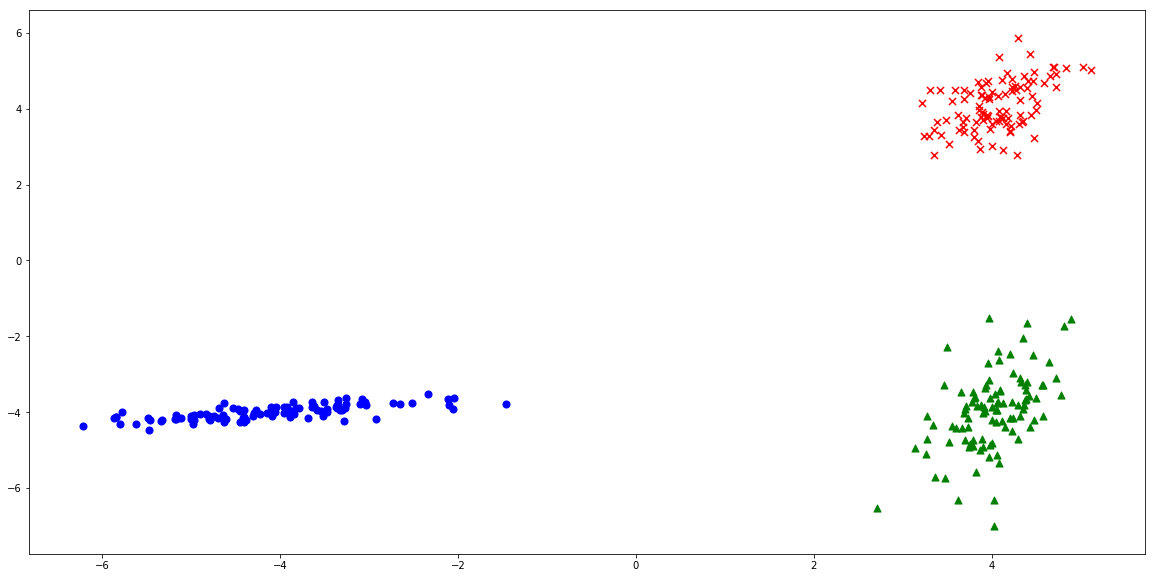

In [23]:
from sklearn.datasets import make_classification

X_three_class, y_three_class = make_classification(n_samples=300,n_informative =2, n_features=2,n_redundant=0, n_classes =3,class_sep=4 ,n_clusters_per_class=1)
pylab.rcParams['figure.figsize'] = (20, 10)

for i in range(0, y_three_class.size):
    if(y_three_class[i]==0):
        plt.scatter(X_three_class[:, 0][i], X_three_class[:, 1][i], s=50, marker='^', color='g')
    elif(y_three_class[i]==1):
        plt.scatter(X_three_class[:, 0][i], X_three_class[:, 1][i], s=50, marker='o', color ='b' )
    else:
        plt.scatter(X_three_class[:, 0][i], X_three_class[:, 1][i], s=50, marker='x', color ='r' )
plt.show()

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

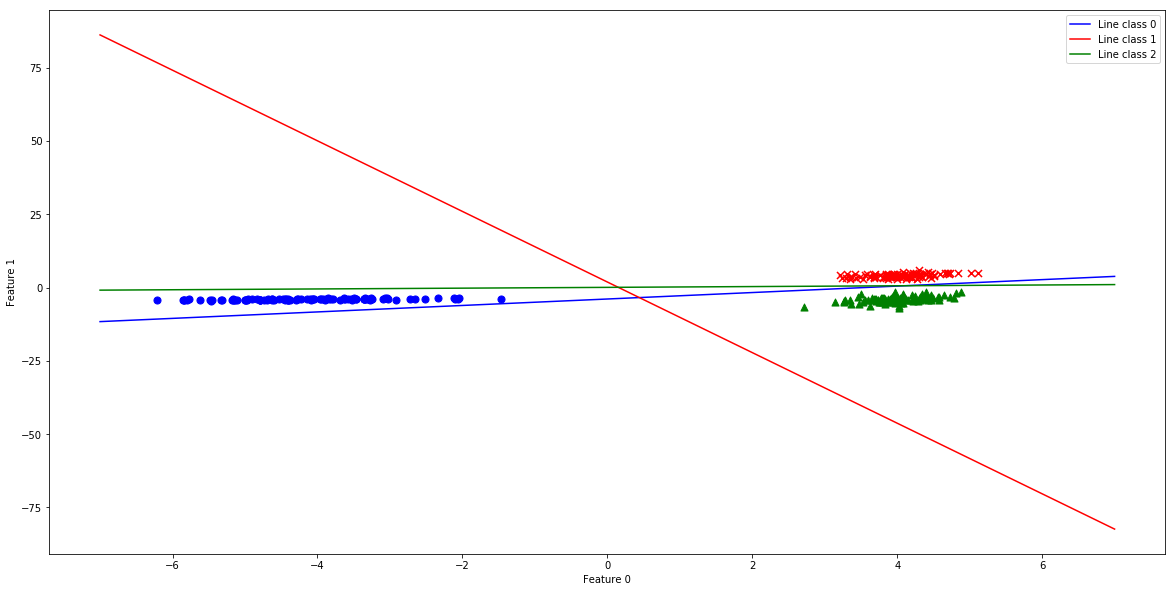

In [24]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state=0).fit(X_three_class, y_three_class)
line = np.linspace(-7, 7)
for coef, intercept, color, i in zip(linear_svc.coef_, linear_svc.intercept_,['b', 'r', 'g'],[ 'Line class 0', 'Line class 1','Line class 2']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, label=i)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

for i in range(0, y_three_class.size):
    if(y_three_class[i]==0):
        plt.scatter(X_three_class[:, 0][i], X_three_class[:, 1][i], s=50, marker='^', color='g')
    elif(y_three_class[i]==1):
        plt.scatter(X_three_class[:, 0][i], X_three_class[:, 1][i], s=50, marker='o', color ='b' )
    else:
        plt.scatter(X_three_class[:, 0][i], X_three_class[:, 1][i], s=50, marker='x', color ='r')
plt.legend(loc='best')

plt.show()

Accuracy score is 1.0


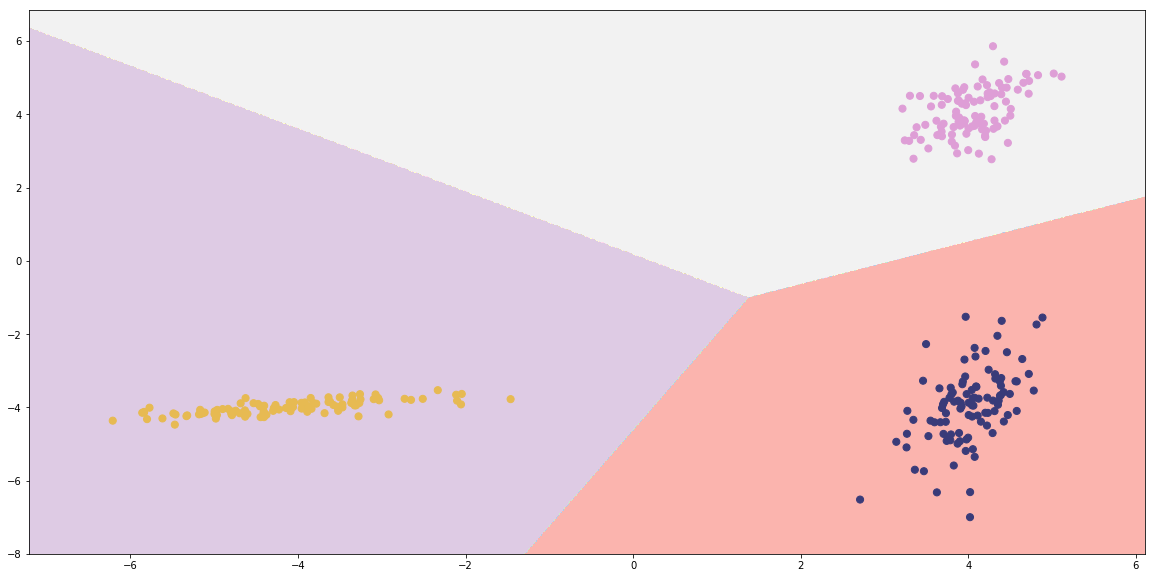

In [25]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
OVR = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_three_class, y_three_class)
OVO = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_three_class, y_three_class)
print("Accuracy score is {}".format(accuracy_score(y_three_class,linear_svc.predict(X_three_class))))

plot_2d_clf_problem(X_three_class, y_three_class, lambda x: linear_svc.predict(x))

Accuracy score is 1.0


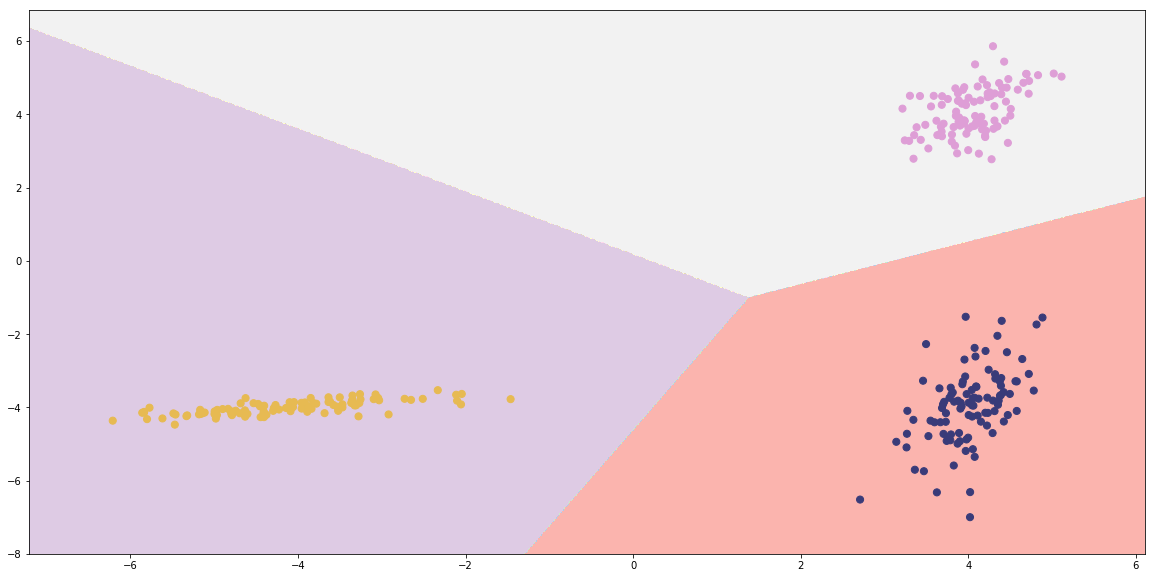

In [26]:
print("Accuracy score is {}".format(accuracy_score(y_three_class,OVR.predict(X_three_class))))

plot_2d_clf_problem(X_three_class, y_three_class, lambda x: OVR.predict(x))

Accuracy score is 1.0


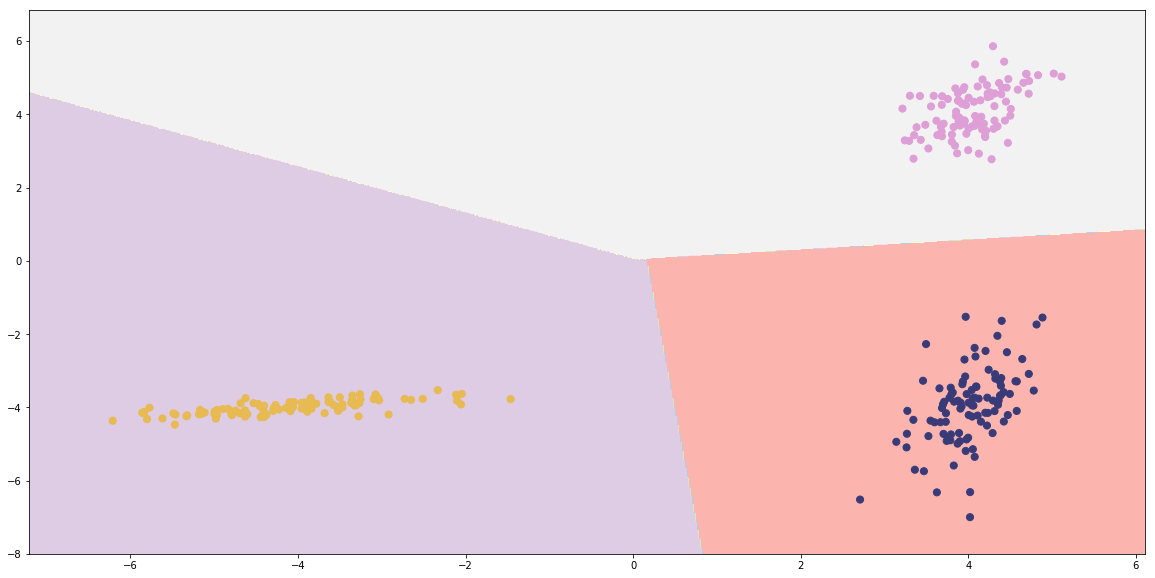

In [27]:
print("Accuracy score is {}".format(accuracy_score(y_three_class,OVO.predict(X_three_class))))

plot_2d_clf_problem(X_three_class, y_three_class, lambda x: OVO.predict(x))

In [28]:
def predict(X):
    maximum = 0
    index = 0
    for coef, intercept, i in zip(linear_svc.coef_, linear_svc.intercept_,[0, 1, 2]):
        h = (X[0]*coef[0]+X[1]*coef[1]+intercept)/(numpy.sqrt((coef[0])**2+(coef[1])**2))
        if(i==0):
            maximum = h
            index = i
        if(h >= maximum):
            maximum = h
            index = i
    return index

In [29]:
for i in range(0, y_three_class.size):
    if(y_three_class[i]==2):
        print("{} {}".format(predict(X_three_class[i]),y_three_class[i]))

2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2


Accuracy score is 1.0


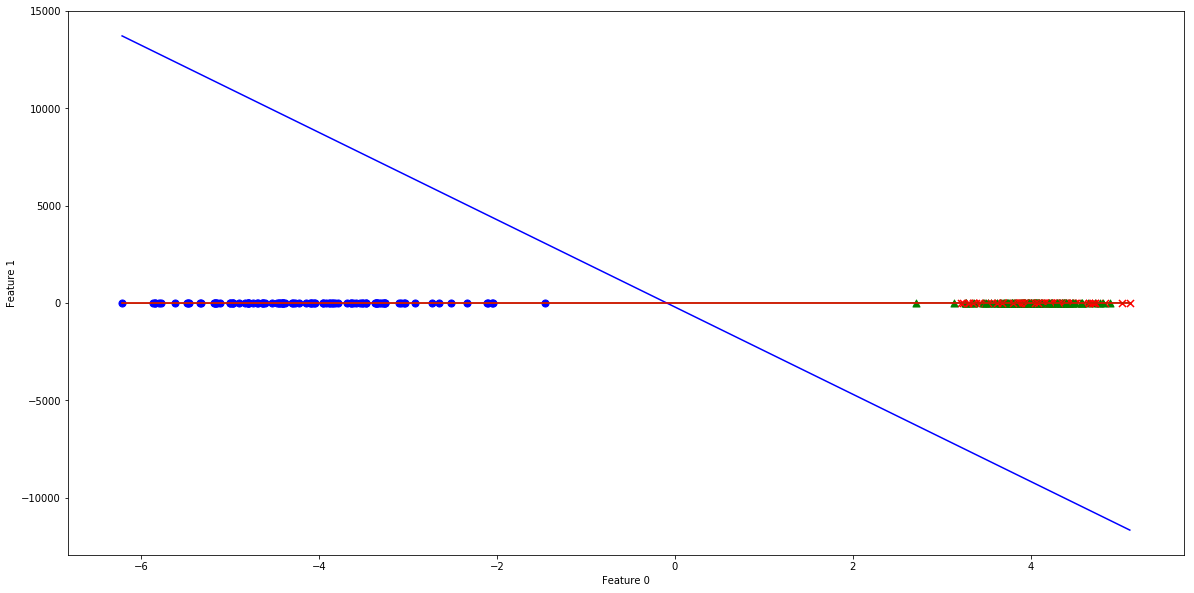

In [30]:
ridge1 = RidgeClassifier(alpha = 0).fit(X_three_class, y_three_class)
pylab.rcParams['figure.figsize'] = (20, 10)

for i in range(0, y_three_class.size):
    if(y_three_class[i]==0):
        plt.scatter(X_three_class[:, 0][i], X_three_class[:, 1][i], s=50, marker='^', color='g')
    elif(y_three_class[i]==1):
        plt.scatter(X_three_class[:, 0][i], X_three_class[:, 1][i], s=50, marker='o', color ='b' )
    else:
        plt.scatter(X_three_class[:, 0][i], X_three_class[:, 1][i], s=50, marker='x', color ='r' )


line = linspace(min(X_three_class[:, 0]), max(X_three_class[:, 0]))
for coef, intercept, color, i in zip(ridge1.coef_, ridge1.intercept_,['g', 'b', 'r'],[ 'Line class 0', 'Line class 1','Line class 2']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color, label=i)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")                         


                           
print("Accuracy score is {}".format(accuracy_score(y_three_class,ridge1.predict(X_three_class))))
plt.show()

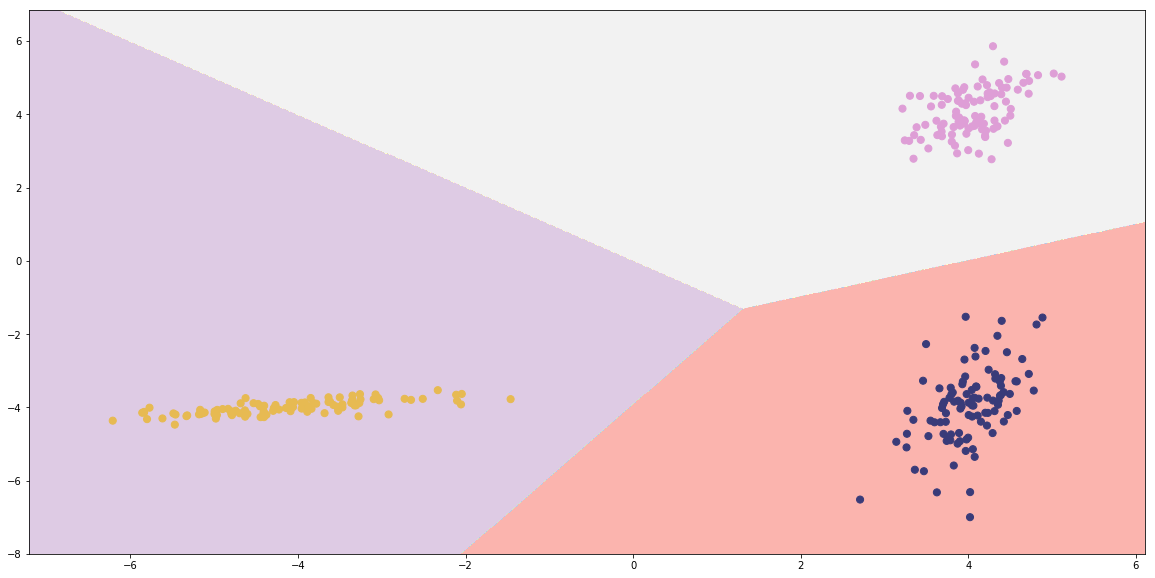

In [31]:
plot_2d_clf_problem(X_three_class, y_three_class, lambda x: ridge1.predict(x))

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [32]:
def sigm(x, alfa=1):
    return 1/(1+numpy.exp(-alfa*x))

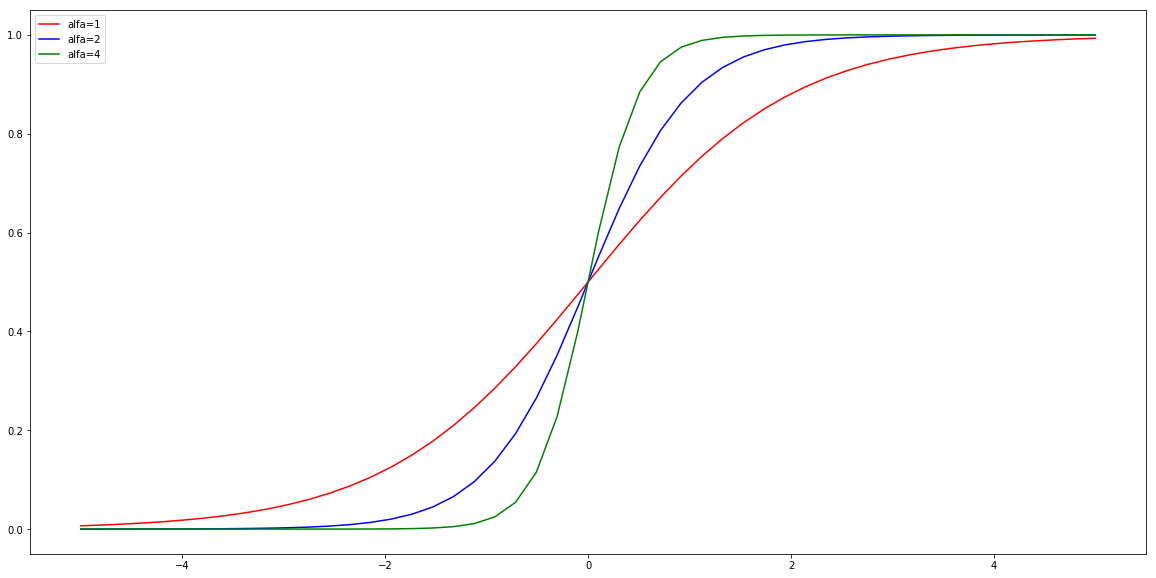

In [33]:
line = linspace(-5,5)
for alfa, color, l in zip([1, 2, 4], ['r', 'b', 'g'], ['alfa=1','alfa=2','alfa=4']):
    plt.plot(line, sigm(line,alfa), color=color, label=l)
plt.legend(loc='best')
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [34]:
y = numpy.array([1,-1,1,1,-1,1,1,-1,1,1,-1])
mini = min(y)
factor = 1/(max(y)-mini)
print("{}".format(factor*(y-numpy.ones(y.size)*mini)))
print("{}".format(seven_X[1,:].size))

[ 1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.]
2


In [64]:
from copy import copy, deepcopy
from sklearn.preprocessing import PolynomialFeatures
def lr_h(x,w):
    
    
    return sigm(numpy.matmul(numpy.transpose(w),x))

def cross_entropy_error(X, y, w):
    sum = 0 
    for i in range(0, y.size):
        sum += -(y[i])*numpy.log(lr_h(X[i,:],w))-(1-y[i])*numpy.log(1-lr_h(X[i,:],w))
    return sum

def lr_train(X, y, eta=0.005, max_iter=200000, alpha=0, epsilon =0.00001, trace=False):
    
    poly = PolynomialFeatures(degree=1).fit(X,y)
    N, n = X.shape
    w, w0 = np.zeros((1, n)), 0
    
    wPast = []
    mini = min(y)
    factor = 1/(max(y)-mini)
    ws = np.append(np.array([w0]), np.array(w))

    y = deepcopy(factor*(y-numpy.ones(y.size)*mini))
    wPast.append(ws)
    last_error = 100000
    
    for i in range(0, max_iter):
        dw, dw0 = np.zeros(n), 0
        X_trans = poly.transform(X)
        for xi, yi, x_trans in zip(X, y, X_trans):
            h = lr_h(x_trans, np.append(np.array([w0]), np.array(w)))
            dw0 += h-yi
            dw += (h - yi) * xi
            


        w0 -= eta * dw0
        w = (1 - eta * alpha) * w - eta * dw


        w_s = np.append(np.array([w0]), np.array(w))
        cross_entr_err = cross_entropy_error(X_trans, y, w_s)

        
        if(trace):
            ws = np.append(np.array([w0]), np.array(w))
            wPast.append(ws)
        if(epsilon>=np.abs(cross_entr_err-last_error)):
            if(trace):
                return np.array(list(wPast))
            else:
                return w_s
        last_error = cross_entr_err
    if(trace):
        return np.array(list(wPast))
    else:
        return w_s

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[ 10.65099911  -3.04043869   0.35345453]
Pogreška unakrsne entropije je : 0.17767738372327818


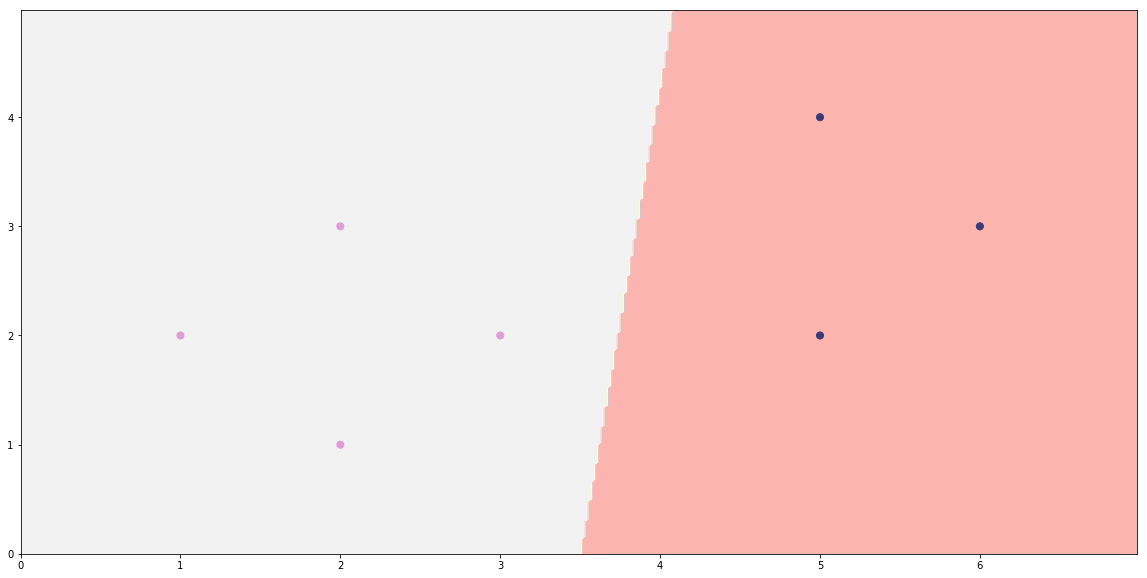

In [65]:
w = lr_train(seven_X, seven_y)
print("{}".format(w))
poly = PolynomialFeatures(degree=1).fit(seven_X, seven_y)
X_trans = poly.transform(seven_X)
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(np.append(np.array([1]), np.array(x)),w)>=0.5)
print("Pogreška unakrsne entropije je : {}".format(cross_entropy_error(X_trans, seven_y, w)))

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [38]:
def zero_one_loss(X,y,w):
    sum = 0
    for i in range(0, y.size):
        sum += numpy.abs(y[i]-(lr_h(X[i,:], w)>=0.5))
    return sum

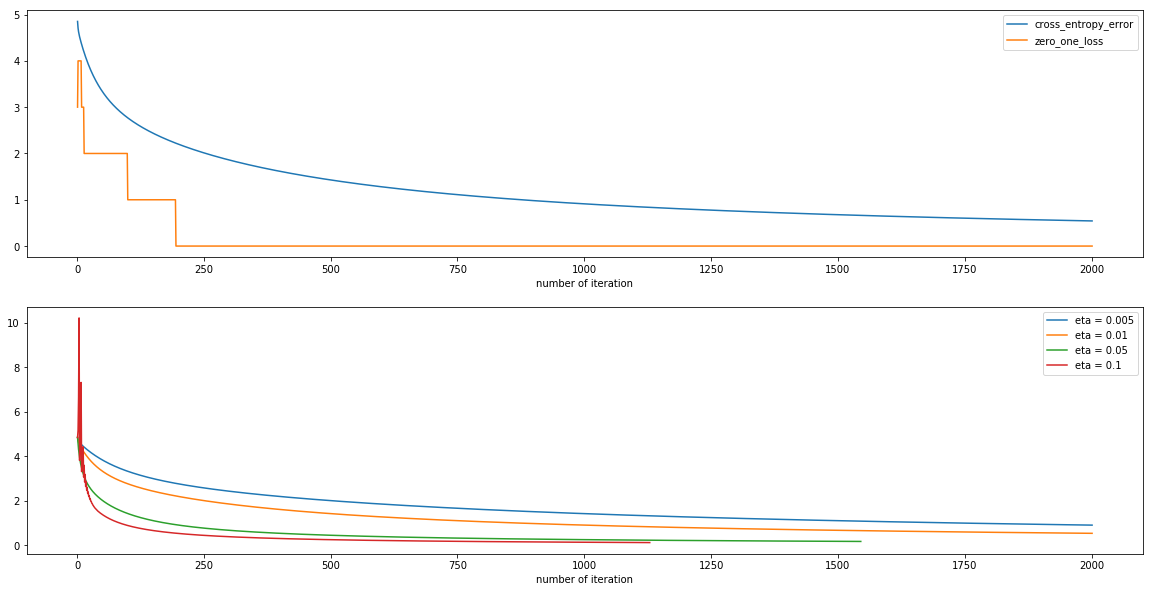

In [39]:
iteracije = []
cross_entr_error = []
zero_one = []
eta_005 = []
eta_05 = []
eta_1 = []
poly = PolynomialFeatures(degree=1).fit(seven_X, seven_y)
X_trans = poly.transform(seven_X)
for eta in [0.005, 0.01, 0.05, 0.1]:
        w = []
        w = lr_train(seven_X, seven_y, eta, 2000, 0, 0.0001, True)
        for i in range(0,w[:,0].size ):
            if(eta == 0.01):
                iteracije.append(i)
                cross_entr_error.append(cross_entropy_error(X_trans, seven_y, w[i,:]))
                zero_one.append(zero_one_loss(X_trans,seven_y,w[i,:]))
            elif(eta == 0.005):
                eta_005.append(cross_entropy_error(X_trans, seven_y, w[i,:]))
            elif(eta == 0.05):
                eta_05.append(cross_entropy_error(X_trans, seven_y, w[i,:]))    
            elif(eta == 0.1):
                eta_1.append(cross_entropy_error(X_trans, seven_y, w[i,:]))
                
iteracije_a = np.array(list(iteracije))
cross_entr_error_a = np.array(list(cross_entr_error))
zero_one_a = np.array(list(zero_one))
eta_005_a = np.array(list(eta_005))
eta_05_a = np.array(list(eta_05))
eta_1_a = np.array(list(eta_1))


fig, axes = plt.subplots(2,1,figsize=(20, 10))
axes[0].plot(np.linspace(1.0, cross_entr_error_a[:].size, num=cross_entr_error_a[:].size), cross_entr_error_a, label='cross_entropy_error')
axes[0].plot(np.linspace(1.0, zero_one_a[:].size, num=zero_one_a[:].size), zero_one_a, label='zero_one_loss')
axes[0].legend(loc='best')
axes[0].set_xlabel('number of iteration')


    
axes[1].plot(np.linspace(1.0, eta_005_a[:].size, num=eta_005_a[:].size), eta_005_a, label= 'eta = 0.005')
axes[1].plot(np.linspace(1.0, cross_entr_error_a[:].size, num=cross_entr_error_a[:].size), cross_entr_error_a, label= 'eta = 0.01')
axes[1].plot(np.linspace(1.0, eta_05_a[:].size, num=eta_05_a[:].size), eta_05_a, label= 'eta = 0.05')
axes[1].plot(np.linspace(1.0, eta_1_a[:].size, num=eta_1_a[:].size), eta_1_a, label= 'eta = 0.1')


axes[1].legend(loc='best')
axes[1].set_xlabel('number of iteration')
pylab.rcParams['figure.figsize'] = (20, 10)

plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

[1 1 1 0 0 0 0]
[[ 0.49343801  0.50656199]
 [ 0.28658837  0.71341163]
 [ 0.25404588  0.74595412]
 [ 0.53466632  0.46533368]
 [ 0.79493372  0.20506628]
 [ 0.61518571  0.38481429]
 [ 0.82054777  0.17945223]]
Accuracy score is 0.8571428571428571


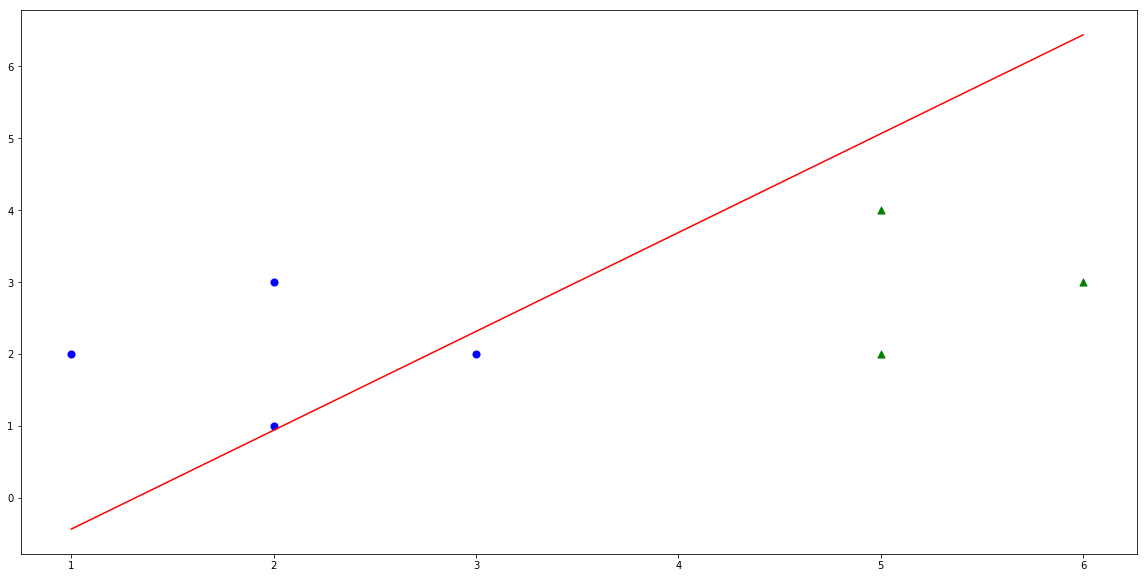

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(seven_X, seven_y)
print("{}".format (log_reg.predict(seven_X)))
print("{}".format (log_reg.predict_proba(seven_X)))

line = linspace(min(seven_X[:,0]),max(seven_X[:,0]))
for i in range(0, seven_y.size):
    if(seven_y[i]==0):
        plt.scatter(seven_X[:, 0][i], seven_X[:, 1][i], s=50, marker='^', color='g')
    else:
        plt.scatter(seven_X[:, 0][i], seven_X[:, 1][i], s=50, marker='o', color ='b' )


plt.plot(line, -(line*log_reg.coef_[0][0]+log_reg.intercept_)/log_reg.coef_[0][1], 'r')
print("Accuracy score is {}".format(accuracy_score(seven_y,log_reg.predict(seven_X))))
plt.show()

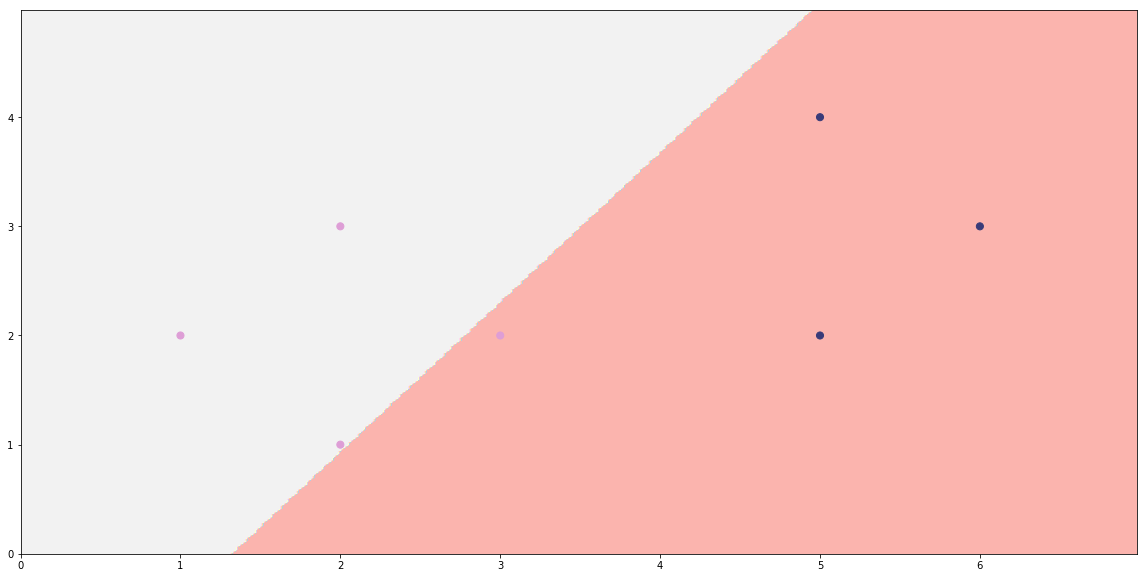

In [41]:
plot_2d_clf_problem(seven_X, seven_y, lambda x: log_reg.predict(x))

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

[1 1 1 0 0 0 0 0]
[[ 0.49571364  0.50428636]
 [ 0.29582114  0.70417886]
 [ 0.25490608  0.74509392]
 [ 0.54690962  0.45309038]
 [ 0.80984433  0.19015567]
 [ 0.64539717  0.35460283]
 [ 0.83947632  0.16052368]
 [ 0.96481883  0.03518117]]
Accuracy score is 0.875


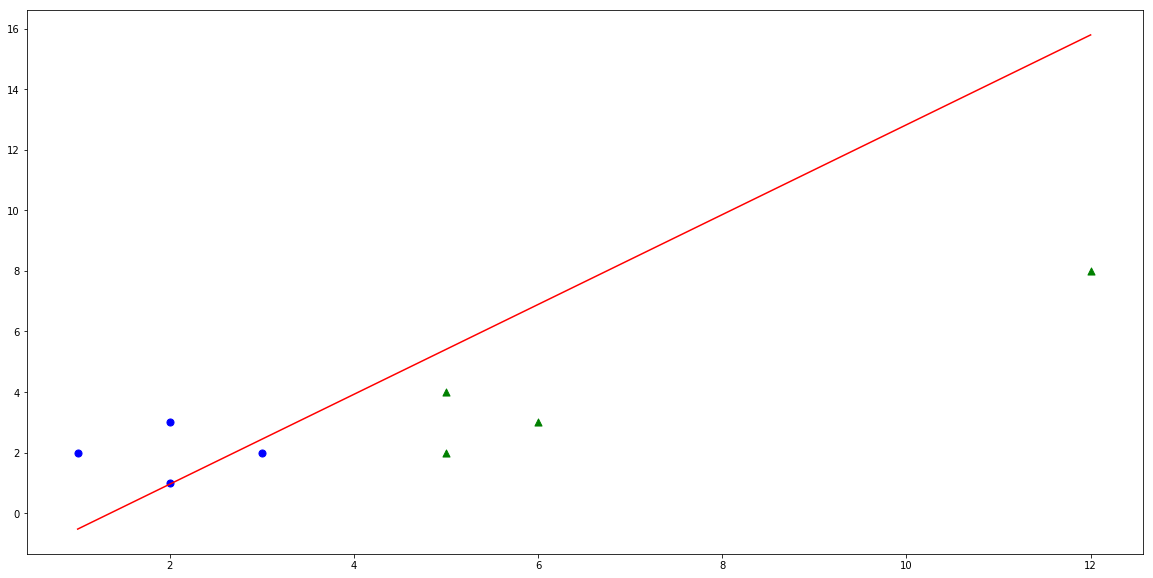

In [42]:
log_reg = LogisticRegression().fit(outlier_X, outlier_y)
print("{}".format (log_reg.predict(outlier_X)))
print("{}".format (log_reg.predict_proba(outlier_X)))

line = linspace(min(outlier_X[:,0]),max(outlier_X[:,0]))
for i in range(0, outlier_y.size):
    if(outlier_y[i]==0):
        plt.scatter(outlier_X[:, 0][i], outlier_X[:, 1][i], s=50, marker='^', color='g')
    else:
        plt.scatter(outlier_X[:, 0][i], outlier_X[:, 1][i], s=50, marker='o', color ='b' )


plt.plot(line, -(line*log_reg.coef_[0][0]+log_reg.intercept_)/log_reg.coef_[0][1], 'r')
print("Accuracy score is {}".format(accuracy_score(outlier_y,log_reg.predict(outlier_X))))
plt.show()

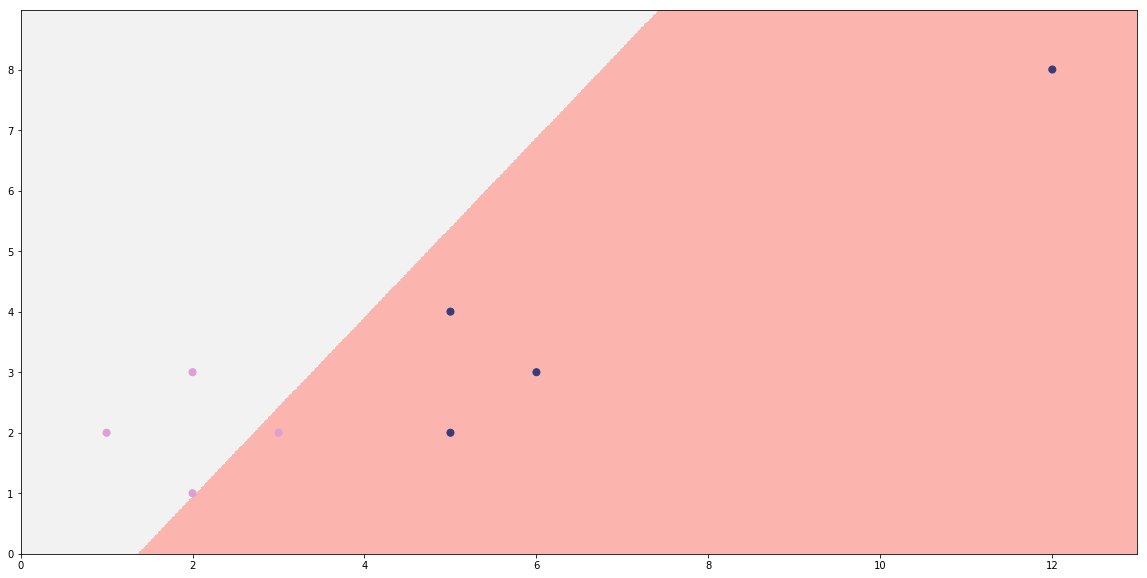

In [43]:
plot_2d_clf_problem(outlier_X, outlier_y, lambda x: log_reg.predict(x))

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


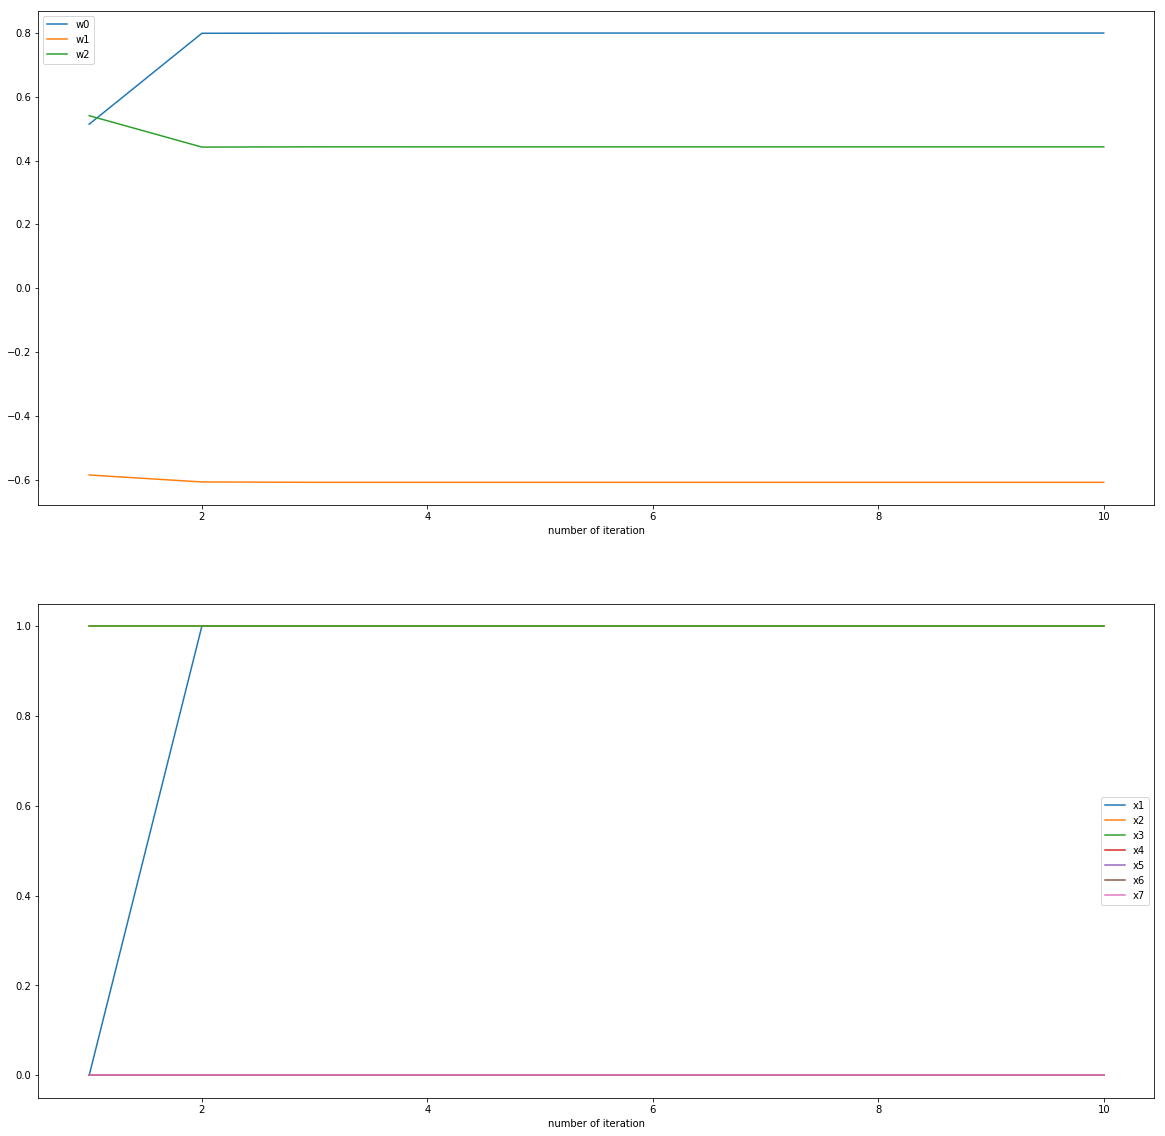

In [44]:
w0 = []
w1 = []
w2 = []
h=[]
lin = []
##1001
for i in range(1,11):
    lin.append(i)
    log_regression =LogisticRegression(max_iter =i).fit(seven_X,seven_y)
    w0.append(log_regression.intercept_)
    w1.append(log_regression.coef_[0][0])
    w2.append(log_regression.coef_[0][1])
    h.append(log_regression.predict(seven_X))


line = np.array(list(lin))
w0array = np.array(list(w0))
w1array = np.array(list(w1))
w2array = np.array(list(w2))
harray = np.array(list(h))
fig, axes = plt.subplots(2,1,figsize=(20, 20))
axes[0].plot(line, w0array, label='w0')
axes[0].plot(line, w1array, label='w1')
axes[0].plot(line, w2array, label='w2')
axes[0].legend(loc='best')
axes[0].set_xlabel('number of iteration')


for j , label in zip(range(0,7),['x1','x2','x3','x4','x5','x6','x7']):
    axes[1].plot(line, harray[:,j], label= label)
axes[1].legend(loc='best')
axes[1].set_xlabel('number of iteration')

plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

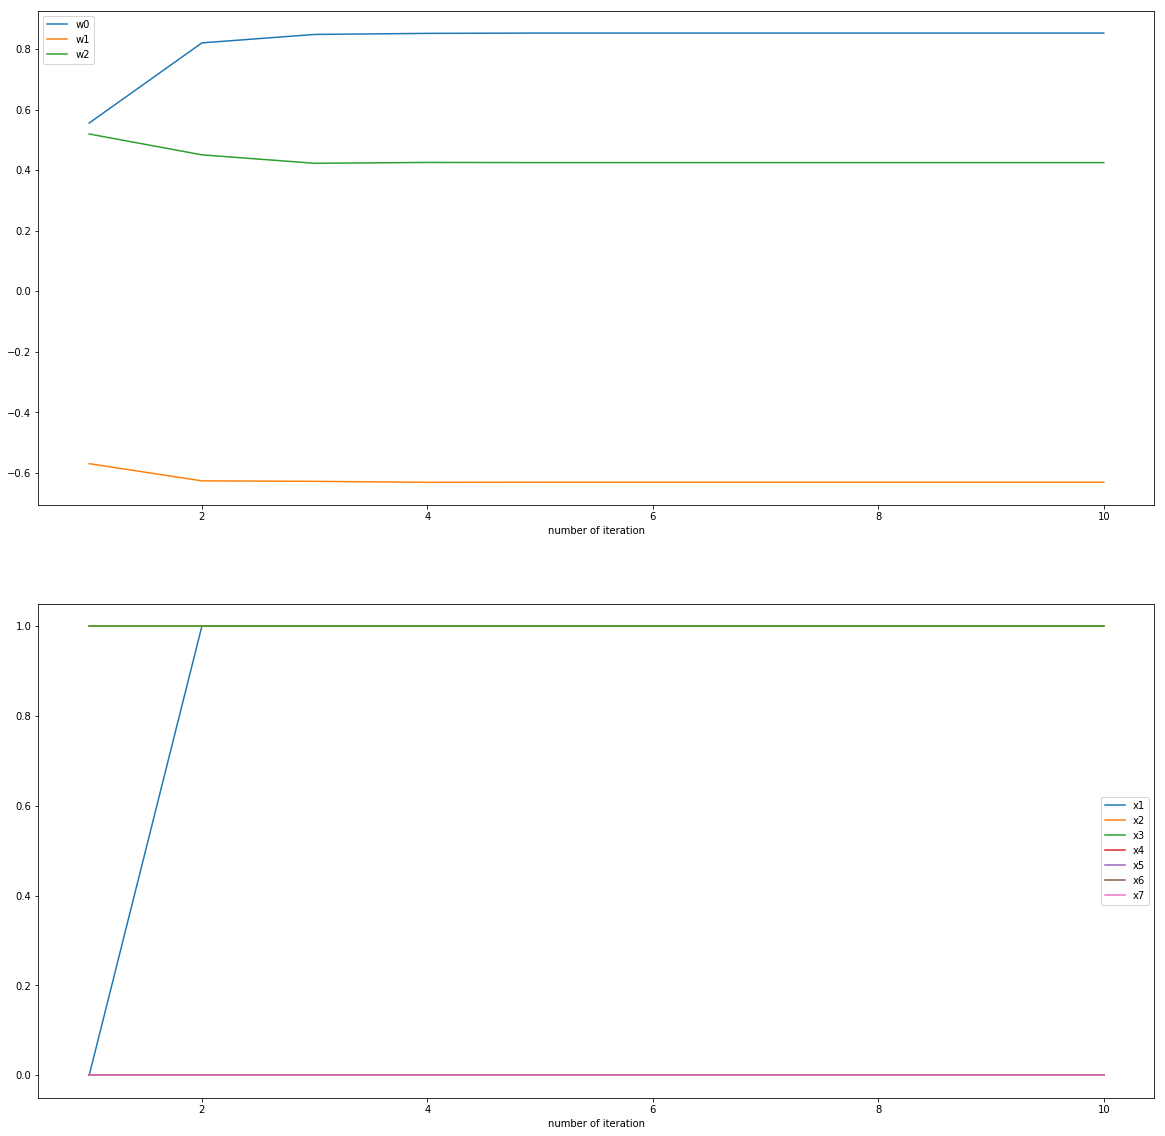

In [45]:
w0 = []
w1 = []
w2 = []
h=[]
lin = []
##1001
for i in range(1,11):
    lin.append(i)
    log_regression =LogisticRegression(max_iter =i).fit(outlier_X,outlier_y)
    w0.append(log_regression.intercept_)
    w1.append(log_regression.coef_[0][0])
    w2.append(log_regression.coef_[0][1])
    h.append(log_regression.predict(outlier_X))


line = np.array(list(lin))
w0array = np.array(list(w0))
w1array = np.array(list(w1))
w2array = np.array(list(w2))
harray = np.array(list(h))
fig, axes = plt.subplots(2,1,figsize=(20, 20))
axes[0].plot(line, w0array, label='w0')
axes[0].plot(line, w1array, label='w1')
axes[0].plot(line, w2array, label='w2')
axes[0].legend(loc='best')
axes[0].set_xlabel('number of iteration')


for j , label in zip(range(0,7),['x1','x2','x3','x4','x5','x6','x7']):
    
    axes[1].plot(line, harray[:,j], label= label)
axes[1].legend(loc='best')
axes[1].set_xlabel('number of iteration')

plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [46]:
from numpy.linalg import norm
def cross_entropy_error2(y,h):
    sum = 0
    for i in range(0, y.size):
        sum+= -y[i]*numpy.log(max(h[i]))-(1-y[i])*numpy.log(1-max(h[i]))
    
    return sum

def l2_norm(w):
    sum = 0
    for i in range(0, w.size):
        sum += w[i]*w[i]
    return numpy.sqrt(sum)

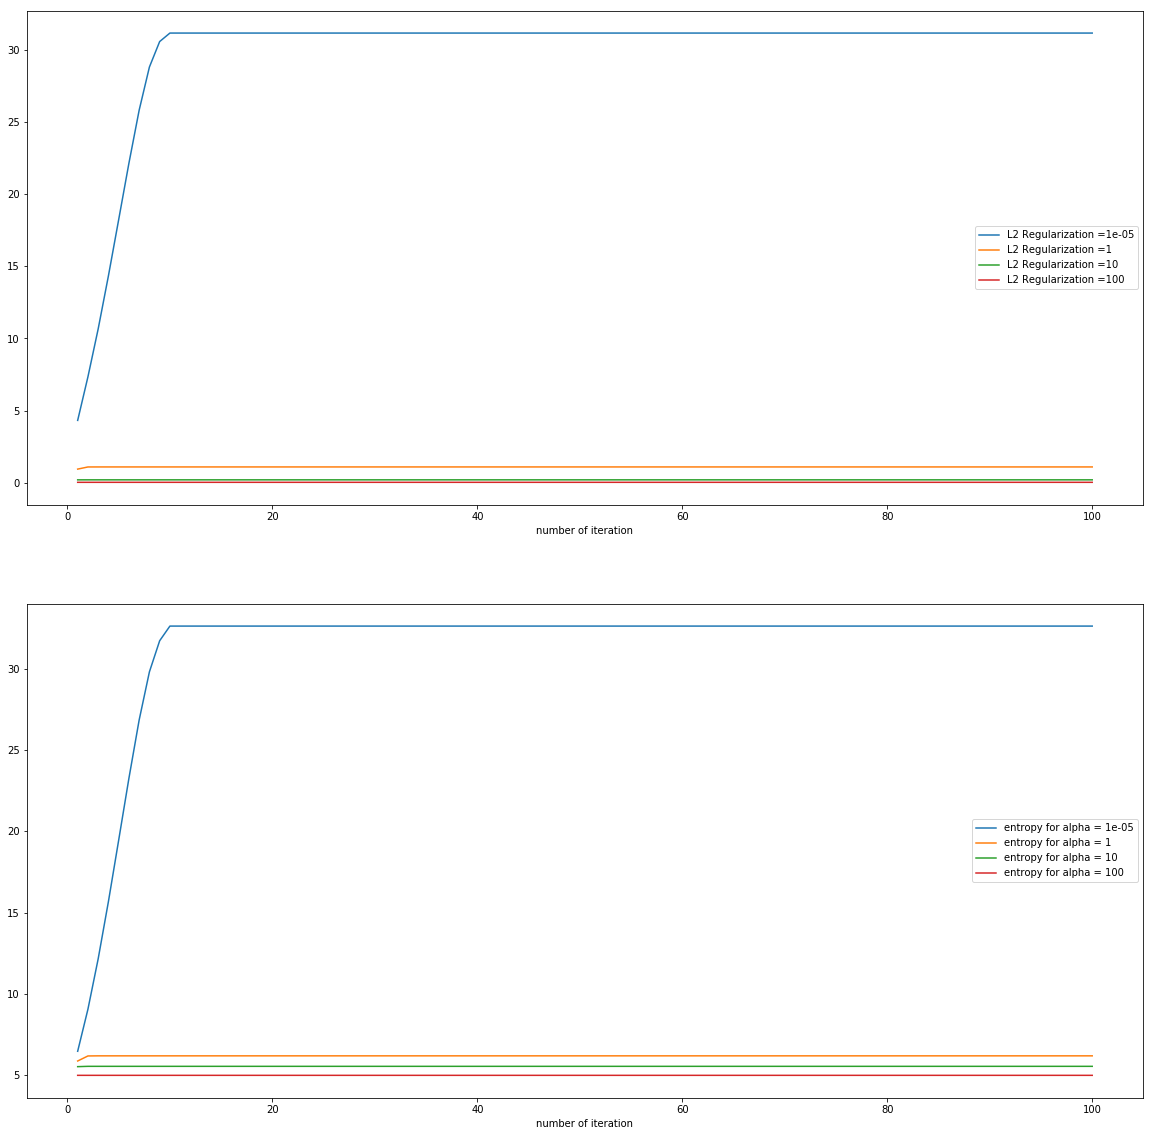

In [47]:
l2_list = []
entropy=[]
lin = []
fig, axes = plt.subplots(2,1,figsize=(20, 20))
for j in [0.00001,1,10,100]:
    l2_list = []
    entropy=[]
    lin = []
    for i in range(1,101):
        lin.append(i)
        log_regression =LogisticRegression(penalty='l2',C=(1/j),max_iter =i).fit(seven_X,seven_y)
        l2_list.append(l2_norm(np.append([log_regression.intercept_],log_regression.coef_)) )
        entropy.append(cross_entropy_error2(seven_y,log_regression.predict_proba(seven_X)))


    line = np.array(list(lin))
    l2_array = np.array(list(l2_list))
    entropy_array = np.array(list(entropy))
    axes[0].plot(line, l2_array, label='L2 Regularization ='+str(j))
    axes[1].plot(line, entropy_array, label= 'entropy for alpha = '+str(j))

axes[0].legend(loc='best')
axes[0].set_xlabel('number of iteration')
axes[1].legend(loc='best')
axes[1].set_xlabel('number of iteration')

plt.show()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [48]:
from sklearn.preprocessing import PolynomialFeatures


#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

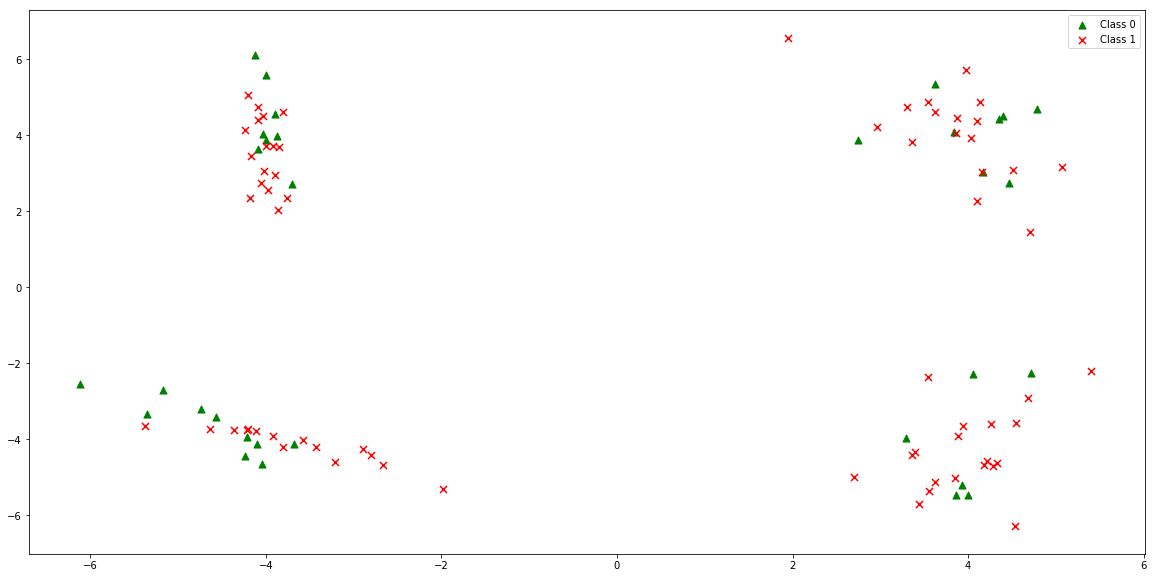

In [49]:
X_two_class, y_two_class = make_classification(n_samples=100,n_informative =2,class_sep=4, n_features=2,n_redundant =0, n_classes =2,n_clusters_per_class=2)
pylab.rcParams['figure.figsize'] = (20, 10)
X00 =[]
X01 =[]

for i in range(0, y_two_class.size):
    if(y_three_class[i]==0):
        X00.append(X_two_class[i])
    else:
        X01.append(X_two_class[i])
X00_array = np.array(list(X00))
X01_array = np.array(list(X01))
plt.scatter(X00_array[:, 0], X00_array[:, 1], s=50, marker='^', color='g', label='Class 0')
plt.scatter(X01_array[:, 0], X01_array[:, 1], s=50, marker='x', color ='r', label='Class 1')



poly2 = PolynomialFeatures(degree=2).fit(X_two_class, y_two_class)
poly3 = PolynomialFeatures(degree=3).fit(X_two_class, y_two_class)
log_regression2 = LogisticRegression(C=1/100).fit(poly2.transform(X_two_class), y_two_class)
log_regression3 = LogisticRegression(C=1/1000).fit(poly3.transform(X_two_class), y_two_class)



plt.legend(loc='best')
plt.show()

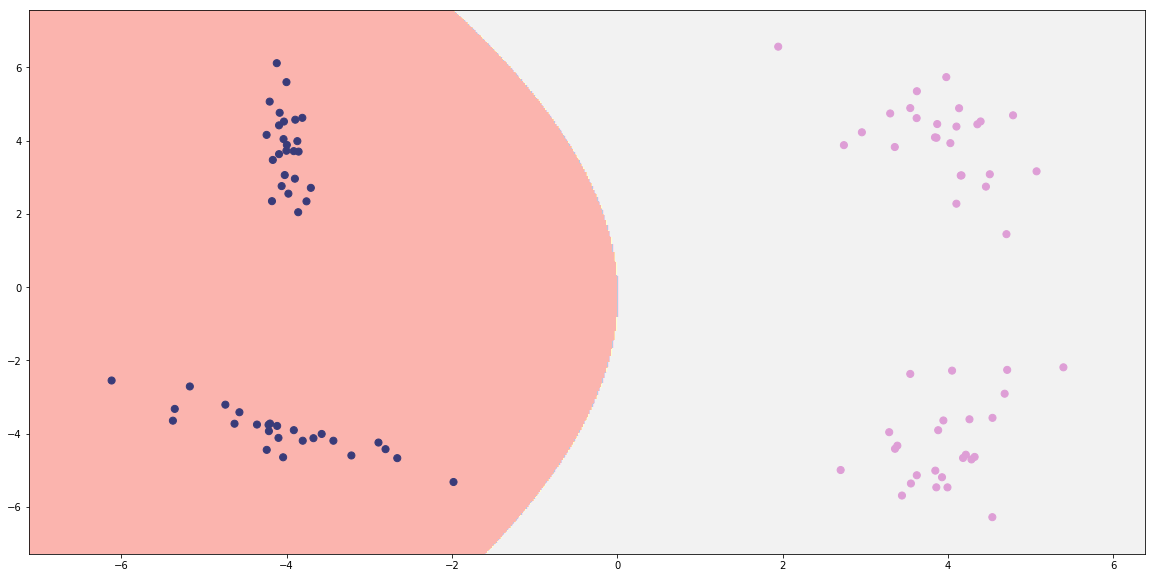

In [50]:
plot_2d_clf_problem(X_two_class, y_two_class, lambda x : log_regression2.predict(poly2.transform(x)))


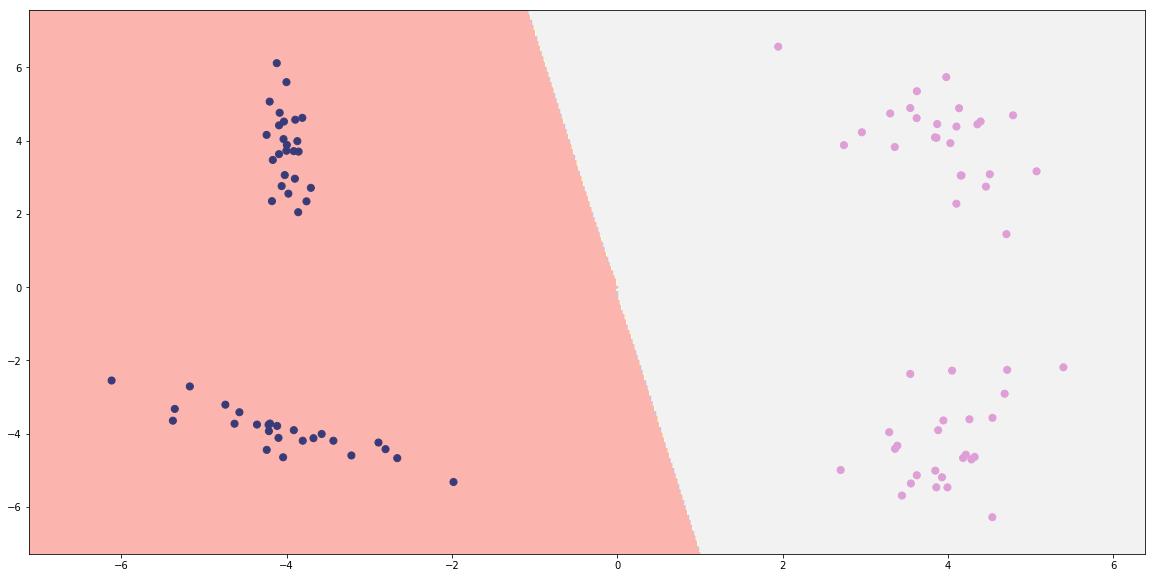

In [51]:
plot_2d_clf_problem(X_two_class, y_two_class, lambda x : log_regression3.predict(poly3.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?